<a href="https://colab.research.google.com/github/ahmadSum1/MIR_Machine_Learning_PARIS_Sebastien/blob/dev_class1/MIRs1_ML_Exercice1_Kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as plt

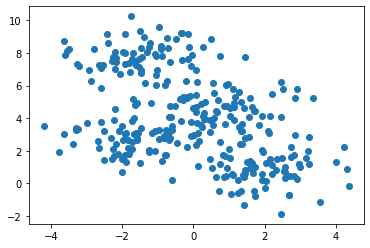

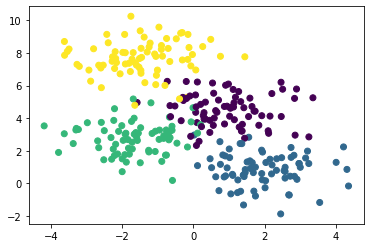

In [17]:
X, y= make_blobs(n_samples=300, centers=4, n_features=2, random_state=0)
# plt.scatter(X[:,0], X[:,1], c=y, cmap='gist_rainbow')
plt.figure(1)
plt.scatter(X[:,0], X[:,1])
plt.figure(2)
plt.scatter(X[:,0], X[:,1], c=y)

**Task 1**  [Minkowski Distance](https://arifromadhan19.medium.com/understanding-clustering-in-unsupervised-learning-b0d7a5f61f03)

In [18]:
def  calc_Lq(x1 , x2 , q=1):
  return (np.sum((np.abs(x1-x2))**q))**(1/q)

VARIFY Task 1

In [19]:
#test
# X1 = np.array([4,8])
# X2 = np.array([6,2])
# calc_Lq(X1,X2,1)

In [20]:
X1 = np.array(X[0,:])
X2 = np.array(X[1,:])

calc_Lq(X1,X2,2)

4.442211434485271




**Task 2: Assign the each point to the nearest cluster**  

In [6]:
def update_assignation(X,U,q):
  A = []
  for i in range(X.shape[0]):
    k = U.shape[0]
    dist = np.zeros(k)
    # print(dist)
    for j in range(k):
      # print (i,j,X[i,:],U[j,:])
      dist[j] = calc_Lq(X[i,:],U[j,:],q)
    c = np.argmin(dist)
    # print(c, dist)
    A.append(c)
  return np.asarray(A)

VARIFY Task 2

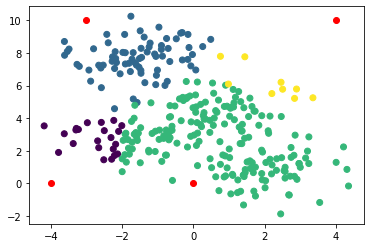

In [21]:
U = np.array([[-4.0, 0.0],
              [-3.0, 10.0],
              [0.0, 0.0],
              [4.0, 10.0]])
a1 = update_assignation(X,U,1)
# plt.scatter(X[:,0], X[:,1], c=a1)
plt.figure(1)
plt.scatter(U[:,0], U[:,1], color="red")
# plt.figure(2)
plt.scatter(X[:,0], X[:,1], c=a1)

**Task 3 update centroid**

In [22]:
def update_centroid(X,a,K):
  d= X.shape[1]
  U = np.zeros((K,d))
  counts = np.zeros(K)
  for i in range(X.shape[0]):
    for j in range(K):
      if j==a[i]:
        U[j,:]+=X[i,:]
        counts[j] +=1
  counts = counts.reshape(K,1)
  return U/counts

**varify task 3**

[[-2.74398284  2.7572005 ]
 [-1.56026379  7.67032787]
 [ 0.71981595  2.5771521 ]
 [ 2.16448085  6.15149427]]


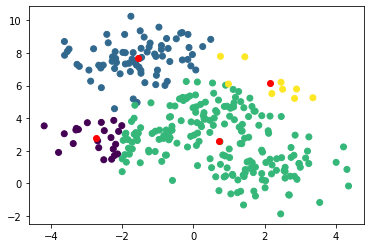

In [23]:
U1 = update_centroid(X, a1, 4)
print (U1)
plt.figure(1)
# plt.figure(2)
plt.scatter(X[:,0], X[:,1], c=a1)

plt.scatter(U1[:,0], U1[:,1], color="red")

**Task 4 compute loss**
(Inertia)

calculates the sum of distances of all the points within a cluster from the centroid of that cluster.

In [24]:
def  compute_Kmeans_loss(X,U,a,q):
    loss = 0;
    for k in range(U.shape[0]):
        for i in range(X.shape[0]):
            if k==a[i]:
                loss += calc_Lq(X[i], U[k], q)
    return loss

**varify Task 4**

In [26]:
compute_Kmeans_loss(X, U1, a1, 2)

546.2381343343799

**Task 5**

Write the main function *myKmeans(X,K,q,T)* where K is the number of centroids, q the Lq norm parameter and T the number of iteration. You will have to sample the initial value of your centroid (U matrix).

Please sample K indexes from the set 0,...,n-1 without replacement. Plot the loss function versus iteration. How is the convergence ?. Check the impact of q.

In [ ]:
def myKmeans(X,K,q,T):
    for t in range(T):
        

**task 6**

 Run your myKmeans(X,K,q,T) on X with K=4, T=20 and q=2. For each iteration, plot the data, the updated centroid and the voronoi diagram.

**task 7**

 With a maximum Kmax = 30, find the estimated K minimizing the BIC criteria. Plot versus k=2;...,Kmax, the BIC criteria.